## DFO Nutrient Comparison Si:N ratios -- 201812, 201905, 202007F

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import scipy.interpolate as sinterp
import pickle
import cmocean

fs=24
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 ''')
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [2]:

PATH= '/results/SalishSea/nowcast-green.201812/'
start_date = dt.datetime(2015,1,1)
end_date = dt.datetime(2017,12,31)

saveloc='/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/'
modver='201812'
fname=f'dataDFO_{modver}_{start_date.strftime("%Y%m%d")}_{start_date.strftime("%Y%m%d")}.pkl'
data1=pickle.load(open(os.path.join(saveloc,fname),'rb'))
modver='201905'
fname=f'dataDFO_{modver}_{start_date.strftime("%Y%m%d")}_{start_date.strftime("%Y%m%d")}.pkl'
data2=pickle.load(open(os.path.join(saveloc,fname),'rb'))

modver='202007F'
matchpath = ['/data/sallen/results/MEOPAR/202007/202007F/ObsModel_202007F_bot_20150101_20151231.csv',
             '/data/sallen/results/MEOPAR/202007/202007F/ObsModel_202007F_bot_20160101_20161231.csv',
             '/data/sallen/results/MEOPAR/202007/202007F/ObsModel_202007F_bot_20170101_20171231.csv']
dfs=list()
for ipath in matchpath:
    dfs.append(pd.read_csv(ipath,index_col=0))
data3=pd.concat(dfs,ignore_index=True)
data3.dropna(axis=1,how='all',inplace=True)
data3['dtUTC']=[dt.datetime.strptime(ii,'%Y-%m-%d %H:%M:%S') for ii in data3['dtUTC']]


In [3]:
cm1=cmocean.cm.thermal_r
#plt.get_cmap('PuBuGn')
#cm1=cmo.cm.matter
theta=-30
lon0=-123.9
lat0=49.3
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc') as bathy:
    bathylon=np.copy(bathy.variables['nav_lon'][:,:])
    bathylat=np.copy(bathy.variables['nav_lat'][:,:])
    bathyZ=np.copy(bathy.variables['Bathymetry'][:,:])
#blon,blat=rotmap(bathylon,bathylat,lon0,lat0,theta)

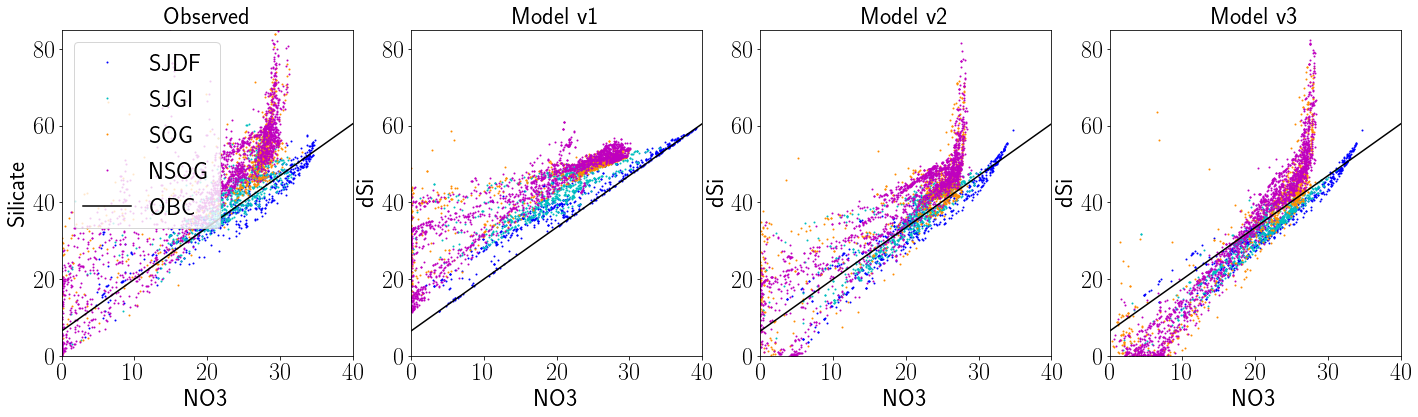

In [9]:
fig,ax=plt.subplots(1,4,figsize=(24,6))
ms=2
ver={1:'v1',2:'v2',3:'v3'}
for ii, data in enumerate((data1,data2,data3)):
    dJDF=data.loc[(data.Lon<-123.3)&(data.Lat<48.6)]
    dSJGI=data.loc[(data.Lon>=-123.6)&(data.Lat<48.9)]
    dSOG=data.loc[(data.Lat>=48.9)&(data.Lon>-124.0)]
    dNSOG=data.loc[(data.Lat>=48.9)&(data.Lon<=-124.0)]
    p5=ax[ii+1].plot(dJDF['mod_nitrate'],dJDF['mod_silicon'],'b.',ms=ms,label='SJDF')
    p6=ax[ii+1].plot(dSJGI['mod_nitrate'],dSJGI['mod_silicon'],'c.',ms=ms,label='SJGI')
    p7=ax[ii+1].plot(dSOG['mod_nitrate'],dSOG['mod_silicon'],'.',color='darkorange',ms=ms,label='SOG')
    p8=ax[ii+1].plot(dNSOG['mod_nitrate'],dNSOG['mod_silicon'],'m.',ms=ms,label='NSOG')
    ax[ii+1].plot(np.arange(0,41),1.35*np.arange(0,41)+6.46,'k-',label='OBC')
    ax[ii+1].set_title('Model '+ver[ii+1])
    ax[ii+1].set_xlabel('NO3')
    ax[ii+1].set_ylabel('dSi')
    ax[ii+1].set_xlim(0,40)
    ax[ii+1].set_ylim(0,85)


p1=ax[0].plot(dJDF['N'],dJDF['Si'],'b.',ms=ms,label='SJDF')
p2=ax[0].plot(dSJGI['N'],dSJGI['Si'],'c.',ms=ms,label='SJGI')
p3=ax[0].plot(dSOG['N'],dSOG['Si'],'.',color='darkorange',ms=ms,label='SOG')
p4=ax[0].plot(dNSOG['N'],dNSOG['Si'],'m.',ms=ms,label='NSOG')
ax[0].plot(np.arange(0,41),1.35*np.arange(0,41)+6.46,'k-',label='OBC')
ax[0].set_title('Observed')
ax[0].set_xlabel('NO3')
ax[0].set_ylabel('Silicate')
ax[0].set_xlim(0,40)
ax[0].set_ylim(0,85)
ax[0].legend()

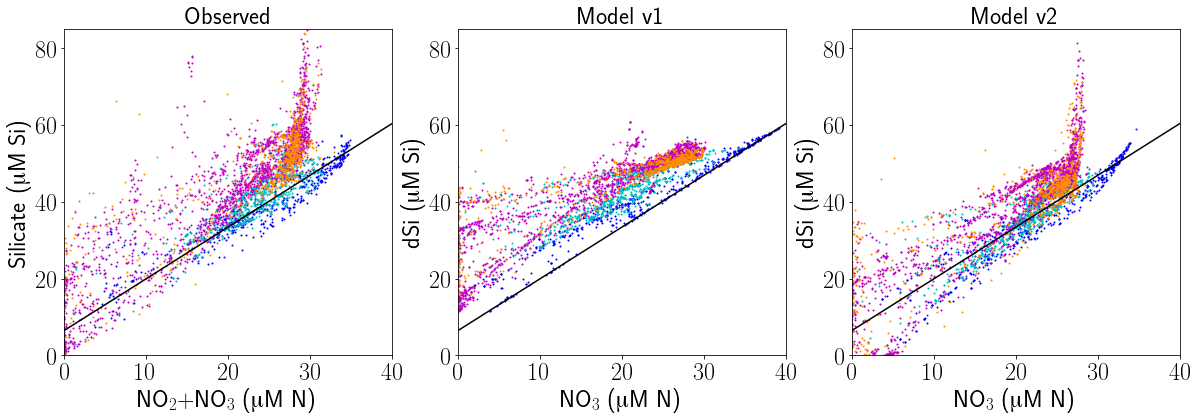

In [15]:
fig,ax=plt.subplots(1,3,figsize=(20,6))
ms=2
ver={1:'v1',2:'v2',3:'v3'}
for ii, data in enumerate((data1,data2)):#,data3)):
    dJDF=data.loc[(data.Lon<-123.3)&(data.Lat<48.6)]
    dSJGI=data.loc[(data.Lon>=-123.6)&(data.Lat<48.9)]
    dSOG=data.loc[(data.Lat>=48.9)&(data.Lon>-124.0)]
    dNSOG=data.loc[(data.Lat>=48.9)&(data.Lon<=-124.0)]
    p5=ax[ii+1].plot(dJDF['mod_nitrate'],dJDF['mod_silicon'],'b.',ms=ms,label='SJDF')
    p6=ax[ii+1].plot(dSJGI['mod_nitrate'],dSJGI['mod_silicon'],'c.',ms=ms,label='SJGI')
    p8=ax[ii+1].plot(dNSOG['mod_nitrate'],dNSOG['mod_silicon'],'m.',ms=ms,label='NSOG')
    p7=ax[ii+1].plot(dSOG['mod_nitrate'],dSOG['mod_silicon'],'.',color='darkorange',ms=ms,label='SOG')
    ax[ii+1].plot(np.arange(0,41),1.35*np.arange(0,41)+6.46,'k-',label='OBC')
    ax[ii+1].set_title('Model '+ver[ii+1])
    ax[ii+1].set_xlabel('NO$_3$ ($\muup$M N)')
    ax[ii+1].set_ylabel('dSi ($\muup$M Si)')
    ax[ii+1].set_xlim(0,40)
    ax[ii+1].set_ylim(0,85)


p1=ax[0].plot(dJDF['N'],dJDF['Si'],'b.',ms=ms,label='SJDF')
p2=ax[0].plot(dSJGI['N'],dSJGI['Si'],'c.',ms=ms,label='SJGI')
p4=ax[0].plot(dNSOG['N'],dNSOG['Si'],'m.',ms=ms,label='NSOG')
p3=ax[0].plot(dSOG['N'],dSOG['Si'],'.',color='darkorange',ms=ms,label='SOG')
ax[0].plot(np.arange(0,41),1.35*np.arange(0,41)+6.46,'k-',label='OBC')
ax[0].set_title('Observed')
ax[0].set_xlabel('NO$_2$+NO$_3$ ($\muup$M N)')
ax[0].set_ylabel('Silicate ($\muup$M Si)')
ax[0].set_xlim(0,40)
ax[0].set_ylim(0,85)
#ax[0].legend()
fig.savefig('/data/eolson/results/MEOPAR/SiN.png',dpi=300,bbox_inches='tight')

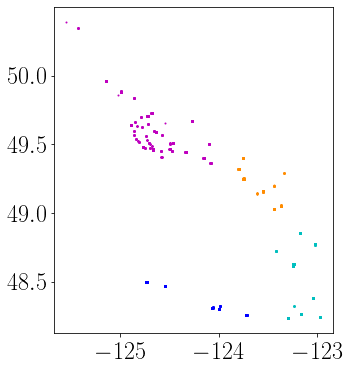

In [16]:
fig,ax=plt.subplots(1,1,figsize=(5,6))
p1=ax.plot(dJDF['Lon'],dJDF['Lat'],'b.',ms=ms,label='SJDF')
p2=ax.plot(dSJGI['Lon'],dSJGI['Lat'],'c.',ms=ms,label='SJGI')
p4=ax.plot(dNSOG['Lon'],dNSOG['Lat'],'m.',ms=ms,label='NSOG')
p3=ax.plot(dSOG['Lon'],dSOG['Lat'],'.',color='darkorange',ms=ms,label='SOG')